In [1]:
import mglearn as mglearn
import pandas as pd
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score, ConfusionMatrixDisplay, log_loss
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import phik


# Данные о телесмотрении пользователей
*В исходном датасете есть данные о телесмотрении 3244 пользователей и их характеристиках: "Размер ДХ", "Тип ресивера", "Федеральный округ", "Тип нас.пункта", "Почтовый индекс"**
*Необходимо предсказать "Оператор", "Есть ли Интернет", "Состав ДХ" в тренировочных данных.

## Exploratory data analysis

In [3]:
# Считываем данные
submit = pd.read_csv('data/raw/all_data.csv')
#train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/all_data.csv'

In [6]:
train.corr()

,id,hhid,Общее телесмотрение,Телесмотрение ночью,Телесмотрение утром,Телесмотрение в рабочее время,Телесмотрение в вечернее время,Телесмотрение в прайм тайм,Общее телесмотрение Пн-Пт,Телесмотрение ночью Пн-Пт,...,Просмотр жанра хоби в рабочее время,Просмотр жанра хобби в праздники,Просмотр жанра спорт в рабочее время,Просмотр жанра спорт в праздники,Просмотр жанра музыка в рабочее время,Просмотр жанра музыка в праздники,Просмотр жанра образования в рабочее время,Просмотр жанра образование в праздники,Размер ДХ,Почтовый индекс
id,1.000000,-0.010504,0.026502,0.015460,0.012705,0.024272,0.031773,0.013434,0.019650,0.009486,...,-0.002068,0.015728,-0.006138,-0.002161,-0.018261,-0.009607,0.028976,0.015862,-0.060657,0.011596
hhid,-0.010504,1.000000,0.062068,0.112733,0.018780,0.047128,0.001241,0.050355,0.036552,0.088857,...,0.048703,0.049388,0.000764,-0.023100,0.002656,0.005104,0.053287,0.080777,-0.042373,0.074826
Общее телесмотрение,0.026502,0.062068,1.000000,0.634818,0.777369,0.931882,0.637193,0.524935,0.869815,0.570899,...,0.316499,0.364048,0.161161,0.110284,0.148249,0.182516,0.246204,0.273123,-0.067833,0.020109
Телесмотрение ночью,0.015460,0.112733,0.634818,1.000000,0.559635,0.431591,0.178843,0.271902,0.516332,0.839145,...,0.508646,0.626248,0.056589,0.029877,0.150419,0.136872,0.398900,0.510964,-0.107791,0.195747
Телесмотрение утром,0.012705,0.018780,0.777369,0.559635,1.000000,0.676875,0.267119,0.205495,0.655895,0.480133,...,0.290587,0.318278,0.107193,0.083755,0.164082,0.205438,0.186973,0.180805,0.001038,0.026308
Телесмотрение в рабочее время,0.024272,0.047128,0.931882,0.431591,0.676875,1.000000,0.515231,0.313632,0.818180,0.396411,...,0.218008,0.246744,0.192131,0.137849,0.116290,0.164645,0.153030,0.153137,-0.055999,-0.019261
Телесмотрение в вечернее время,0.031773,0.001241,0.637193,0.178843,0.267119,0.515231,1.000000,0.705661,0.582635,0.202849,...,0.083703,0.090761,0.079247,0.042839,0.049298,0.056264,0.106602,0.098834,-0.033778,-0.092279
Телесмотрение в прайм тайм,0.013434,0.050355,0.524935,0.271902,0.205495,0.313632,0.705661,1.000000,0.475952,0.287230,...,0.099782,0.098336,0.024109,0.000026,0.065345,0.063203,0.153316,0.194706,-0.056447,-0.005878
Общее телесмотрение Пн-Пт,0.019650,0.036552,0.869815,0.516332,0.655895,0.818180,0.582635,0.475952,1.000000,0.590717,...,0.319702,0.238757,0.164599,0.054136,0.160952,0.152678,0.248573,0.168218,-0.055077,0.007080
Телесмотрение ночью Пн-Пт,0.009486,0.088857,0.570899,0.839145,0.480133,0.396411,0.202849,0.287230,0.590717,1.000000,...,0.577189,0.368844,0.059411,0.006961,0.161902,0.111364,0.479351,0.328699,-0.088617,0.146432


In [1]:
# Посмотрим размер исходных данных
print(f'Размер тренировочных данных: {train.shape} (строк,стобцов)')
print(f'Размер тестовых данных: {test.shape} (строк,стобцов)')

NameError: name 'train' is not defined

In [ ]:
# Посмотрим структуру данных
train.head(5)

In [ ]:
train

In [ ]:
# Посмотрим на типы данных в столбцах и наличие пропусков
train.info()

In [ ]:
# Посмотрим на явные пропуски подробнее
train.isna().sum().sort_values(ascending=False)

* В тренировочных данных присутствует незначительное колличество пропусков
* В тестовых данных пропусков нет

Для работы с пропусками при наличии большего количества, мы можем применить замену медианой выборки , а также модой , также при наличии временного интервала мы можем использовать методд ffill() , для замены на близжайшее не пропущенное значение


In [66]:
print(f'Количество дубликатов в тренировочных данных - {train.duplicated().sum()}')
print(f'Количество дубликатов в тестовых данных - {test.duplicated().sum()}')

Количество дубликатов в тренировочных данных - 0
Количество дубликатов в тестовых данных - 0


На первый вгляд дубликатов в данных у нас нет , но в наших данных присутствуют два столбца с уникальными индексами.
**hhid** - возможно это номер во внутренней системе сбора данных, возможно номер ресивера
**id** - номер пользователя
 Для предотвращения дублирования уникальных индексов удалим эти столбцы и повторно проверим данные на дубликаты

In [2]:
# Удаляем столбцы
train = train.drop(['hhid', 'id'], axis=1)
test = test.drop(['hhid', 'id'], axis=1)

NameError: name 'train' is not defined

In [68]:
print(f'Количество дубликатов в тренировочных данных - {train.duplicated().sum()}')
print(f'Количество дубликатов в тестовых данных - {test.duplicated().sum()}')

Количество дубликатов в тренировочных данных - 990
Количество дубликатов в тестовых данных - 2


In [69]:
# Выделим столбцы с числовыми признаками
numeric_columns = train.drop('Почтовый индекс', axis=1).select_dtypes(include=['int'])

**Посмотрим на баланс таргетных переменных**

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='Оператор', ylabel='count'>

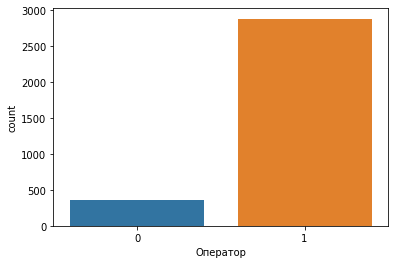

In [23]:
# Баланс классов в переменной "Оператор"
sns.countplot(train['Оператор'].apply(lambda x:1 if x == 'Подключен только к Триколор ТВ' else 0))

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='Есть ли Интернет', ylabel='count'>

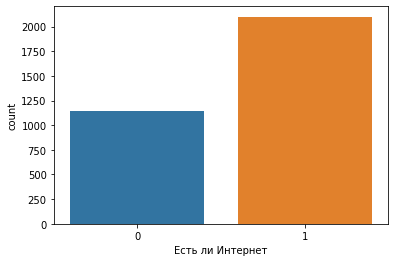

In [24]:
# Баланс классов в переменной "Есть ли Интернет"
sns.countplot(train['Есть ли Интернет'].apply(lambda x:1 if x == 'Есть' else 0))

* Мы наблюдаем дисбаланс классов , экземпляров положительного класса значительно больше, такое часто встречается при анализе пользовательcкого опыта , у нас может быть недостаточно много наблюдений например по оттоку пользователей {1: 'пользуется сервисом', 0: 'прекратил пользование'}

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='Состав ДХ', ylabel='count'>

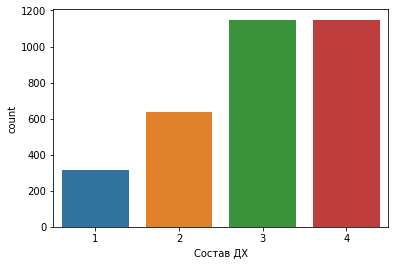

In [25]:
sns.countplot(train['Состав ДХ'].apply(lambda x:1 if x=='Есть члены семьи в возрасте 55+ лет и есть до 18 лет' else(2 if x=='Нет членов семьи в возрасте 55+ лет и нет до 18 лет' else(3 if x=='Нет членов семьи в возрасте 55+ лет и есть до 18 лет' else 4))))

* По `Составу домохозяйств` наблюдаем меньшее количество наблюдений у 1 и 2 группы

<AxesSubplot:xlabel='Размер ДХ', ylabel='Общее телесмотрение'>

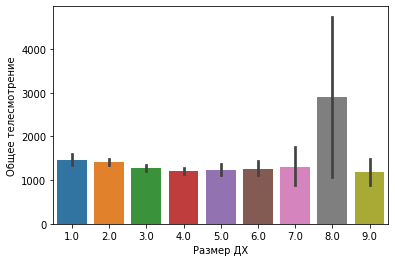

In [26]:
sns.barplot(data=train,x='Размер ДХ', y='Общее телесмотрение')

In [27]:
train['Размер ДХ'].value_counts().sort_values()

8.0      2
9.0     13
7.0     22
6.0    107
5.0    273
1.0    381
4.0    686
3.0    767
2.0    968
Name: Размер ДХ, dtype: int64

По большим семьям данных в выборке недостаточно:
* 2 наюлюдения для Размера ДХ - 8
* 6 наблюдений Размера ДХ - 9
* 15 наблюдений Размера ДХ - 7

**Посмотрим распределение основных переменных суммировавших пользовательскую активность**

basic_features = [i for i in numeric_columns if 'Телесмотрение' in i]

for feature in basic_features:
    sns.distplot(train[feature])
    plt.show()

* Мы наблюдаем несимметричное распределение переменных, по форме они имеют положительную асимметрию, виден длинный "хвост" вправо , вызванный наличием высоких значений, также мы можем отметить наличие большого количества 0 значений.
* Данные по просмотрам представлены в секундах , присутствие нулевых значений судя по всему означает -  отсутствие факта просмотра в данной категории, эти данные отражают активность пользователя , они понадобятся нам при обучения модели
* Аномально большие значения переменных , мы можем отсеять, но нужно учитывать не большой размер обучающего набора данных, оставим эти значения на первоначальном этапе, мы попробуем использовать модель робастную к выбросам
Сравним распределения с тестовой выборкой

for feature in basic_features:
    sns.distplot(test[feature])
    plt.show()

Распределения на тестировочной выборке аналогичны

for feature in basic_features:
    sns.boxplot(data=train[feature])\
    .set_title(feature, fontsize=16)
    plt.show()

Для анализа нелинейных взаимосвязей переменных выведем коэффицент корреляции - $$Phik (фk)$$

Phik (фk)- is a new and practical correlation coefficient that works consistently between categorical, ordinal and interval variables, captures non-linear dependency and reverts to the Pearson correlation coefficient in case of a bivariate normal input distribution.

Phik (фk)-  это новый и практичный коэффициент корреляции, который последовательно работает между категориальными, порядковыми и интервальными переменными, фиксирует нелинейную зависимость и возвращается к коэффициенту корреляции Пирсона в случае двумерного нормального распределения входных данных

 ![towardsdatascience.com](https://miro.medium.com/max/875/1*fJgN6ttFEYaOm-hdpuSXrQ.png)

In [115]:
# Произведем расчет коэффицентов корреляции Phik
phik_corr = train.dropna().phik_matrix()

interval columns not set, guessing: ['Общее телесмотрение', 'Телесмотрение ночью', 'Телесмотрение утром', 'Телесмотрение в рабочее время', 'Телесмотрение в вечернее время', 'Телесмотрение в прайм тайм', 'Общее телесмотрение Пн-Пт', 'Телесмотрение ночью Пн-Пт', 'Телесмотрение утром Пн-Пт', 'Телесмотрение в рабочее время Пн-Пт', 'Телесмотрение в вечернее время Пн-Пт', 'Телесмотрение в прайм тайм Пн-Пт', 'Общее телесмотрение в выходные', 'Телесмотрение ночью в выходные', 'Телесмотрение утром в выходные', 'Телесмотрение в рабочее время в выходные', 'Телесмотрение вечером в выходные', 'Телесмотрение в прайм тайм в выходные', 'Просмотр жанра кино в рабочее время', 'Просмотр жанра кино в праздники', 'Просмотр жанра приключения в рабочее время', 'Просмотр жанра приключение в праздники', 'Просмотра жанра сад в рабочее время', 'Просмотр жанра сад в праздники', 'Просмотра жанра комедия в рабочее время', 'Просмотр жанра комедия в праздники', 'Просмотр жанра хоби в рабочее время', 'Просмотр жанра х

**Посмотрим на взаимосвязи переменных**

In [30]:
# Таргет - Оператор
phik_corr['Оператор'].sort_values(ascending=False)

NameError: name 'phik_corr' is not defined

In [31]:
# Таргет - Есть ли Интернет
phik_corr['Есть ли Интернет'].sort_values(ascending=False)

NameError: name 'phik_corr' is not defined

In [118]:
# Таргет - Состав ДХ
phik_corr['Состав ДХ'].sort_values(ascending=False).values

array([1.        , 0.6437102 , 0.2791505 , 0.16869379, 0.13662244,
       0.13583101, 0.13559347, 0.13317635, 0.13242454, 0.13136252,
       0.13015127, 0.1282652 , 0.12736188, 0.12710213, 0.12492191,
       0.12177355, 0.1203758 , 0.11730733, 0.11310039, 0.10991932,
       0.10652502, 0.10646974, 0.10579516, 0.10553644, 0.10518691,
       0.103277  , 0.09996313, 0.09969669, 0.09882402, 0.09418609,
       0.09162756, 0.08834043, 0.08754416, 0.08418416, 0.08239479,
       0.081767  , 0.08058971, 0.07755289, 0.07464321, 0.06125863,
       0.05251511, 0.04210104])

Исходя из показателей phik-корреляции мы можем сделать предварительные выводы о значимости взаимосвязей переменных.


<AxesSubplot:>

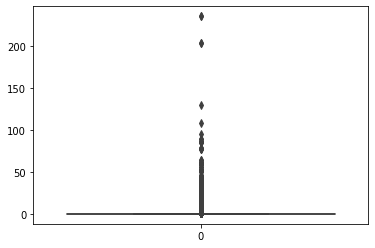

In [119]:
sns.boxplot(data=train['Просмотр жанра приключения в рабочее время'])

## Подготовка данных

In [108]:
train

,Общее телесмотрение,Телесмотрение ночью,Телесмотрение утром,Телесмотрение в рабочее время,Телесмотрение в вечернее время,Телесмотрение в прайм тайм,Общее телесмотрение Пн-Пт,Телесмотрение ночью Пн-Пт,Телесмотрение утром Пн-Пт,Телесмотрение в рабочее время Пн-Пт,...,Просмотр жанра образования в рабочее время,Просмотр жанра образование в праздники,Размер ДХ,Тип ресивера,Оператор,Есть ли Интернет,Состав ДХ,ФО,Тип нас.пункта,Почтовый индекс
654,208.0,130.0,78.0,0,0,0.0,0.0,0.0,0,0,...,0.0,10.0,2.0,Ресивер с поддержкой HDTV,1,Есть,Нет членов семьи в возрасте 55+ лет и нет до 1...,Приволжский федеральный округ,Город с численностью менее 45 тыс.,45
1096,1697.0,226.0,202.0,873,383,13.0,964.0,93.0,116,623,...,0.0,0.0,2.0,Ресивер с поддержкой HDTV,1,Есть,Нет членов семьи в возрасте 55+ лет и нет до 1...,Северо-Кавказский федеральный округ,Город с численностью менее 45 тыс.,35
311,1340.0,623.0,534.0,57,120,6.0,584.0,167.0,249,42,...,42.0,19.0,3.0,Ресивер с поддержкой HDTV,1,Есть,Нет членов семьи в возрасте 55+ лет и есть до ...,Приволжский федеральный округ,Сельский населенный пункт,46
2423,3883.0,676.0,410.0,1942,340,515.0,1215.0,336.0,113,465,...,16.0,40.0,3.0,Ресивер с поддержкой HEVC,1,Есть,Есть члены семьи в возрасте 55+ лет и нет до 1...,Сибирский федеральный округ,Сельский населенный пункт,63
325,2.0,0.0,0.0,2,0,0.0,0.0,0.0,0,0,...,0.0,0.0,2.0,Ресивер с поддержкой HDTV,1,Есть,Есть члены семьи в возрасте 55+ лет и нет до 1...,Центральный федеральный округ,Город более 400 тыс.,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,2363.0,488.0,390.0,1173,235,77.0,823.0,0.0,77,602,...,0.0,3.0,5.0,Ресивер с поддержкой HEVC,1,Есть,Нет членов семьи в возрасте 55+ лет и есть до ...,Сибирский федеральный округ,Сельский населенный пункт,66
1158,2069.0,173.0,339.0,1478,79,0.0,925.0,173.0,131,581,...,0.0,0.0,2.0,Ресивер с поддержкой HEVC,1,Нет,Нет членов семьи в возрасте 55+ лет и нет до 1...,Центральный федеральный округ,Город с численностью менее 45 тыс.,60
1193,849.0,3.0,200.0,583,63,0.0,849.0,3.0,200,583,...,0.0,0.0,4.0,Ресивер с поддержкой HEVC,1,Есть,Нет членов семьи в возрасте 55+ лет и есть до ...,Приволжский федеральный округ,Город с численностью менее 45 тыс.,60
1357,1522.0,203.0,180.0,477,362,300.0,800.0,193.0,180,173,...,0.0,0.0,4.0,Ресивер с поддержкой HEVC,1,Нет,Нет членов семьи в возрасте 55+ лет и есть до ...,Северо-Кавказский федеральный округ,Сельский населенный пункт,35


Исходя из анализа гистограмм распределения частот а также Boxblot , мы наблюдаем у некоторых признаков *сжатые* границы межквартильных размахов, в таком случае удаляя выбросы стастистически мы можем потерять большее количество наблюдений
* У таких признаков преоблают нулевые и около-нулевые значения , посмотрим на значение медианы

In [70]:
print(f'Значение медианы признака с преобладающим количеством выбросов- {train["Просмотр жанра приключения в рабочее время"].median()}')
print(f'Значение  максимального значения признака с преобладающим количеством выбросов {train["Просмотр жанра приключения в рабочее время"].max()}')

Значение медианы признака с преобладающим количеством выбросов- 0.0
Значение  максимального значения признака с преобладающим количеством выбросов 236


Наблюдаем нулевую медиану у признакака, сравним с более сбалансированной выборкой признака:

In [71]:
print(f'Значение медианы - {train["Телесмотрение вечером в выходные"].median()}')
print(f'Значение  максимального значения - {train["Телесмотрение вечером в выходные"].max()}')

Значение медианы - 16.0
Значение  максимального значения - 477


Для удаления выбросов отбросим признаки у которых медиана равна 0 , для остальных признаков применим статистические методы борьбы с выбросами
Основные выборосы в оставшихся признаках, сосредоточены у верхних пределов значений выборки.
Для удаления выбросов будем использовать данные о межквартильном размахе (IQR) , первом (Q1) и третьем (Q3) процентилем нашей выборки, исходя из статистических парадигм (ЦПТ) - 90% значений выборки сосредоточено в пределах согласно формуле: $$ Q1 -(+)  1.5 * IQR$$
Для детекции алгоритмом машиного обучения больших значений, а также сохранения максимального количества наблюдений используем большее значение умножающего коэфицента для межквартильного размаха приведем очистку от выбросов по формуле: $$ Q1 +  3.5 * IQR$$

Для остальных признаков медиана которых равна 0 , мы удлим выбросы отсеив 30% верхних предельных значений по формуле: $$ MAX(y) * 0.7 $$

Визуализируем отсечение выбросов

In [72]:
Q1 = train['Телесмотрение ночью'].quantile(0.25)
Q3 = train['Телесмотрение ночью'].quantile(0.75)
IQR = Q3 - Q1
up_limit = Q3 +4 * IQR

Text(0.1, 1020.0, 'Граница выбросов')

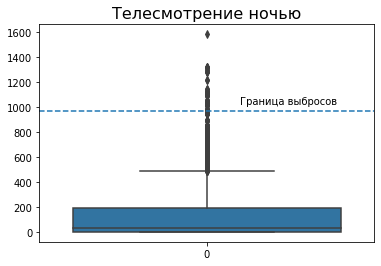

In [73]:
ax = sns.boxplot(data=train['Телесмотрение ночью'])
ax.axhline(up_limit, ls='--')
ax.set_title('Телесмотрение ночью', fontsize=16)
ax.text(0.1,up_limit+50, "Граница выбросов")

В рамках эксперимента мы будем использовать замену выбросов медианой (возможно модой) выборки , для сохранения признакового пространства данных

In [74]:
# Обрабатываем выбросы для тренировочных данных
for i in numeric_columns:
    Q1 = train[i].quantile(0.25)
    Q3 = train[i].quantile(0.75)
    IQR = Q3 - Q1
    up_limit = Q3 + 4 * IQR
    lim_max = train[i].max() * 0.7
    if train[i].median() == 0:
        train[i] = train[i].apply(lambda x: x if x < lim_max else lim_max)
    else:
        train[i] = train[i].apply(lambda x: x if x < up_limit else train[i].median())

In [75]:
# Обрабатываем выбросы для тестовых данных
for i in numeric_columns:
    Q1 = test[i].quantile(0.25)
    Q3 = test[i].quantile(0.75)
    IQR = Q3 - Q1
    up_limit = Q3 + 4 * IQR
    lim_max = test[i].max() * 0.7
    if test[i].median() == 0:
        test[i] = test[i].apply(lambda x: x if x < lim_max else lim_max)
    else:
        test[i] = test[i].apply(lambda x: x if x < up_limit else train[i].median())

**Подготовим данные , закодируем таргетные переменные , избавимся от пропусков**

# Кодируем таргетные переменные
train['Есть ли Интернет'] = train['Есть ли Интернет'].apply(lambda x:1 if x == 'Есть' else 0)
train['Оператор'] = train['Оператор'].apply(lambda x:1 if x == 'Подключен только к Триколор ТВ' else 0)
train['Состав ДХ'] = train['Состав ДХ'].apply(lambda x:1 if x=='Есть члены семьи в возрасте 55+ лет и есть до 18 лет' else(2 if x=='Нет членов семьи в возрасте 55+ лет и нет до 18 лет' else(3 if x=='Нет членов семьи в возрасте 55+ лет и есть до 18 лет' else 4)))

In [76]:
train

,Общее телесмотрение,Телесмотрение ночью,Телесмотрение утром,Телесмотрение в рабочее время,Телесмотрение в вечернее время,Телесмотрение в прайм тайм,Общее телесмотрение Пн-Пт,Телесмотрение ночью Пн-Пт,Телесмотрение утром Пн-Пт,Телесмотрение в рабочее время Пн-Пт,...,Просмотр жанра образования в рабочее время,Просмотр жанра образование в праздники,Размер ДХ,Тип ресивера,Оператор,Есть ли Интернет,Состав ДХ,ФО,Тип нас.пункта,Почтовый индекс
0,647.0,437.0,15.0,12,120,63.0,195.0,0.0,0,12,...,0.0,1.0,4.0,Ресивер с поддержкой HDTV,Подключен только к Триколор ТВ,Нет,Нет членов семьи в возрасте 55+ лет и есть до ...,Северо-Западный федеральный округ,Город с численностью от 45 тыс. до 400 тыс.,182180
1,2657.0,538.0,363.0,1582,174,0.0,415.0,133.0,0,282,...,1.0,109.0,4.0,Ресивер с поддержкой HEVC,Подключен только к Триколор ТВ,Есть,Нет членов семьи в возрасте 55+ лет и есть до ...,Уральский федеральный округ,Город с численностью менее 45 тыс.,457024
2,1385.0,0.0,49.0,1134,202,0.0,729.0,0.0,49,571,...,0.0,0.0,2.0,Ресивер с поддержкой HDTV,Подключен только к Триколор ТВ,Есть,Есть члены семьи в возрасте 55+ лет и нет до 1...,Южный федеральный округ,Город более 400 тыс.,350901
3,2861.0,607.0,857.0,1374,23,0.0,1249.0,294.0,270,662,...,11.0,11.0,2.0,Ресивер с поддержкой HEVC,Подключен только к Триколор ТВ,Нет,Есть члены семьи в возрасте 55+ лет и нет до 1...,Приволжский федеральный округ,Сельский населенный пункт,452774
4,478.0,174.0,44.0,53,79,128.0,260.0,0.0,0,53,...,0.0,0.0,4.0,Ресивер с поддержкой HDTV,Подключен только к Триколор ТВ,Есть,Нет членов семьи в возрасте 55+ лет и есть до ...,Северо-Западный федеральный округ,Сельский населенный пункт,168068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,697.0,0.0,8.0,571,118,0.0,244.0,0.0,0,126,...,0.0,0.0,4.0,Ресивер с поддержкой HDTV,Подключен только к Триколор ТВ,Есть,Нет членов семьи в возрасте 55+ лет и есть до ...,Центральный федеральный округ,Сельский населенный пункт,309830
3240,532.0,2.0,0.0,6,164,360.0,258.0,1.0,0,6,...,0.0,0.0,3.0,Ресивер с поддержкой HEVC,Подключен только к Триколор ТВ,Есть,Нет членов семьи в возрасте 55+ лет и есть до ...,Северо-Западный федеральный округ,Город с численностью менее 45 тыс.,238758
3241,1153.0,212.0,198.0,743,0,0.0,505.0,29.0,197,279,...,0.0,0.0,2.0,Ресивер с поддержкой HEVC,Подключен только к Триколор ТВ,Нет,Есть члены семьи в возрасте 55+ лет и нет до 1...,Центральный федеральный округ,Сельский населенный пункт,307341
3242,871.0,299.0,150.0,422,0,0.0,410.0,215.0,150,45,...,194.0,2.0,3.0,Ресивер с поддержкой HEVC,Подключен только к Триколор ТВ,Есть,Есть члены семьи в возрасте 55+ лет и есть до ...,Уральский федеральный округ,Город с численностью менее 45 тыс.,457020



* Для почтового индекса будем использовать первые два символа - которые означают принаджежность к территориальному субьекту РФ (регион, край, область)
* В рамках эксперимента пробуем также использовать 3 символа почтового индекса, сравниваем качество модели

In [77]:
# Оставляем два символа почтового индекса
train['Почтовый индекс'] = train['Почтовый индекс'].astype('str')
train['Почтовый индекс'] = train['Почтовый индекс'].apply(lambda x:x[:2])
train['Почтовый индекс'] = train['Почтовый индекс'].astype('int')
test['Почтовый индекс'] = test['Почтовый индекс'].astype('str')
test['Почтовый индекс'] = test['Почтовый индекс'].apply(lambda x:x[:2])
test['Почтовый индекс'] = test['Почтовый индекс'].astype('int')

In [78]:
# Удаляем пропуски
train = train.dropna()
test = test.dropna()

# Переходим к CatBoost

In [79]:
train['Оператор'] = train['Оператор'].apply(lambda x:1 if x == 'Подключен только к Триколор ТВ' else 0)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Шаг 1 Выделяем категориальные переменные

In [80]:
train.head(5)

,Общее телесмотрение,Телесмотрение ночью,Телесмотрение утром,Телесмотрение в рабочее время,Телесмотрение в вечернее время,Телесмотрение в прайм тайм,Общее телесмотрение Пн-Пт,Телесмотрение ночью Пн-Пт,Телесмотрение утром Пн-Пт,Телесмотрение в рабочее время Пн-Пт,...,Просмотр жанра образования в рабочее время,Просмотр жанра образование в праздники,Размер ДХ,Тип ресивера,Оператор,Есть ли Интернет,Состав ДХ,ФО,Тип нас.пункта,Почтовый индекс
0,647.0,437.0,15.0,12,120,63.0,195.0,0.0,0,12,...,0.0,1.0,4.0,Ресивер с поддержкой HDTV,1,Нет,Нет членов семьи в возрасте 55+ лет и есть до ...,Северо-Западный федеральный округ,Город с численностью от 45 тыс. до 400 тыс.,18
1,2657.0,538.0,363.0,1582,174,0.0,415.0,133.0,0,282,...,1.0,109.0,4.0,Ресивер с поддержкой HEVC,1,Есть,Нет членов семьи в возрасте 55+ лет и есть до ...,Уральский федеральный округ,Город с численностью менее 45 тыс.,45
2,1385.0,0.0,49.0,1134,202,0.0,729.0,0.0,49,571,...,0.0,0.0,2.0,Ресивер с поддержкой HDTV,1,Есть,Есть члены семьи в возрасте 55+ лет и нет до 1...,Южный федеральный округ,Город более 400 тыс.,35
3,2861.0,607.0,857.0,1374,23,0.0,1249.0,294.0,270,662,...,11.0,11.0,2.0,Ресивер с поддержкой HEVC,1,Нет,Есть члены семьи в возрасте 55+ лет и нет до 1...,Приволжский федеральный округ,Сельский населенный пункт,45
4,478.0,174.0,44.0,53,79,128.0,260.0,0.0,0,53,...,0.0,0.0,4.0,Ресивер с поддержкой HDTV,1,Есть,Нет членов семьи в возрасте 55+ лет и есть до ...,Северо-Западный федеральный округ,Сельский населенный пункт,16


In [81]:
cat_features_names = list(test.select_dtypes('object').columns)
test[cat_features_names]

,Тип ресивера,ФО,Тип нас.пункта
0,Ресивер с поддержкой HDTV,Центральный федеральный округ,Город с численностью менее 45 тыс.
1,Ресивер с поддержкой HEVC,Приволжский федеральный округ,Сельский населенный пункт
2,Ресивер с поддержкой HDTV,Центральный федеральный округ,Город более 400 тыс.
3,Ресивер с поддержкой HEVC,Центральный федеральный округ,Сельский населенный пункт
4,Ресивер с поддержкой HEVC,Сибирский федеральный округ,Город с численностью менее 45 тыс.
...,...,...,...
806,Ресивер с поддержкой HDTV,Центральный федеральный округ,Город более 400 тыс.
807,Ресивер с поддержкой HEVC,Центральный федеральный округ,Сельский населенный пункт
808,Ресивер с поддержкой HDTV,Южный федеральный округ,Город более 400 тыс.
809,Ресивер с поддержкой HEVC,Сибирский федеральный округ,Город более 400 тыс.


In [54]:
X = list(train.drop(['Состав ДХ','Есть ли Интернет', 'Оператор'], axis=1).columns)


# Шаг 2 Создание Pool-обьектов

In [82]:
train

,Общее телесмотрение,Телесмотрение ночью,Телесмотрение утром,Телесмотрение в рабочее время,Телесмотрение в вечернее время,Телесмотрение в прайм тайм,Общее телесмотрение Пн-Пт,Телесмотрение ночью Пн-Пт,Телесмотрение утром Пн-Пт,Телесмотрение в рабочее время Пн-Пт,...,Просмотр жанра образования в рабочее время,Просмотр жанра образование в праздники,Размер ДХ,Тип ресивера,Оператор,Есть ли Интернет,Состав ДХ,ФО,Тип нас.пункта,Почтовый индекс
0,647.0,437.0,15.0,12,120,63.0,195.0,0.0,0,12,...,0.0,1.0,4.0,Ресивер с поддержкой HDTV,1,Нет,Нет членов семьи в возрасте 55+ лет и есть до ...,Северо-Западный федеральный округ,Город с численностью от 45 тыс. до 400 тыс.,18
1,2657.0,538.0,363.0,1582,174,0.0,415.0,133.0,0,282,...,1.0,109.0,4.0,Ресивер с поддержкой HEVC,1,Есть,Нет членов семьи в возрасте 55+ лет и есть до ...,Уральский федеральный округ,Город с численностью менее 45 тыс.,45
2,1385.0,0.0,49.0,1134,202,0.0,729.0,0.0,49,571,...,0.0,0.0,2.0,Ресивер с поддержкой HDTV,1,Есть,Есть члены семьи в возрасте 55+ лет и нет до 1...,Южный федеральный округ,Город более 400 тыс.,35
3,2861.0,607.0,857.0,1374,23,0.0,1249.0,294.0,270,662,...,11.0,11.0,2.0,Ресивер с поддержкой HEVC,1,Нет,Есть члены семьи в возрасте 55+ лет и нет до 1...,Приволжский федеральный округ,Сельский населенный пункт,45
4,478.0,174.0,44.0,53,79,128.0,260.0,0.0,0,53,...,0.0,0.0,4.0,Ресивер с поддержкой HDTV,1,Есть,Нет членов семьи в возрасте 55+ лет и есть до ...,Северо-Западный федеральный округ,Сельский населенный пункт,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,697.0,0.0,8.0,571,118,0.0,244.0,0.0,0,126,...,0.0,0.0,4.0,Ресивер с поддержкой HDTV,1,Есть,Нет членов семьи в возрасте 55+ лет и есть до ...,Центральный федеральный округ,Сельский населенный пункт,30
3240,532.0,2.0,0.0,6,164,360.0,258.0,1.0,0,6,...,0.0,0.0,3.0,Ресивер с поддержкой HEVC,1,Есть,Нет членов семьи в возрасте 55+ лет и есть до ...,Северо-Западный федеральный округ,Город с численностью менее 45 тыс.,23
3241,1153.0,212.0,198.0,743,0,0.0,505.0,29.0,197,279,...,0.0,0.0,2.0,Ресивер с поддержкой HEVC,1,Нет,Есть члены семьи в возрасте 55+ лет и нет до 1...,Центральный федеральный округ,Сельский населенный пункт,30
3242,871.0,299.0,150.0,422,0,0.0,410.0,215.0,150,45,...,194.0,2.0,3.0,Ресивер с поддержкой HEVC,1,Есть,Есть члены семьи в возрасте 55+ лет и есть до ...,Уральский федеральный округ,Город с численностью менее 45 тыс.,45


In [83]:
train, test = train_test_split(train,train_size=0.6,random_state=42)
val, test = train_test_split(test,train_size=0.5,random_state=42)


In [84]:
train[['Состав ДХ','Есть ли Интернет', 'Оператор']]

,Состав ДХ,Есть ли Интернет,Оператор
654,Нет членов семьи в возрасте 55+ лет и нет до 1...,Есть,1
1096,Нет членов семьи в возрасте 55+ лет и нет до 1...,Есть,1
311,Нет членов семьи в возрасте 55+ лет и есть до ...,Есть,1
2423,Есть члены семьи в возрасте 55+ лет и нет до 1...,Есть,1
325,Есть члены семьи в возрасте 55+ лет и нет до 1...,Есть,1
...,...,...,...
3180,Нет членов семьи в возрасте 55+ лет и есть до ...,Есть,1
1158,Нет членов семьи в возрасте 55+ лет и нет до 1...,Нет,1
1193,Нет членов семьи в возрасте 55+ лет и есть до ...,Есть,1
1357,Нет членов семьи в возрасте 55+ лет и есть до ...,Нет,1


# Задаем параметры

In [86]:
from catboost import Pool

train_pool_operator = Pool(train[X],
                           label= train['Оператор'],
                           cat_features= cat_features_names )

valid_pool_operator = Pool(val[X],
                           label= val['Оператор'],
                           cat_features= cat_features_names )

test_pool_operator = Pool(test[X],
                           label= test['Оператор'],
                           cat_features= cat_features_names )


In [89]:
cat_features_names

['Тип ресивера', 'ФО', 'Тип нас.пункта']

In [92]:
params = { 'verbose':200,
           'eval_metric':'F1',
          'loss_function': 'Logloss',
          'random_seed': 2000,
          'learning_rate': 0.01,
          'auto_class_weights': 'SqrtBalanced',
          'leaf_estimation_method': 'Newton',
          'bootstrap_type':'Bernoulli'}

In [93]:
model = CatBoostClassifier(**params)

In [94]:
model.fit(train_pool_operator,eval_set=valid_pool_operator,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8510057	test: 0.8513647	best: 0.8513647 (0)	total: 72.5ms	remaining: 1m 12s
200:	learn: 0.8497292	test: 0.8512970	best: 0.8522079 (1)	total: 13.7s	remaining: 54.4s
400:	learn: 0.8747976	test: 0.8603062	best: 0.8603062 (365)	total: 19.5s	remaining: 29.1s
600:	learn: 0.8957793	test: 0.8676520	best: 0.8676520 (556)	total: 26.5s	remaining: 17.6s
800:	learn: 0.9283444	test: 0.8771435	best: 0.8771435 (786)	total: 33.9s	remaining: 8.43s
999:	learn: 0.9596012	test: 0.8967701	best: 0.8967701 (984)	total: 40.3s	remaining: 0us

bestTest = 0.8967700895
bestIteration = 984

Shrink model to first 985 iterations.


In [98]:
pd.DataFrame(model.get_best_score())

,learn,validation
Logloss,0.246007,0.440744
F1,0.959601,0.896770


# Проверим модель на кросс валидации Cross validation

In [99]:
from catboost import cv

In [100]:
cv_data = cv(
    params = params,
    pool = train_pool_operator,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False
)

Training on fold [0/5]

bestTest = 0.8523274325
bestIteration = 999

Training on fold [1/5]

bestTest = 0.8479507327
bestIteration = 897

Training on fold [2/5]

bestTest = 0.9012717992
bestIteration = 777

Training on fold [3/5]

bestTest = 0.8897682585
bestIteration = 933

Training on fold [4/5]

bestTest = 0.877698136
bestIteration = 996



In [101]:
cv_data

,iterations,test-F1-mean,test-F1-std,train-F1-mean,train-F1-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
0,0,0.837732,0.025593,0.846852,0.005448,0.690470,0.000417,0.690067,0.000309
1,1,0.844563,0.019325,0.850787,0.004618,0.687741,0.000862,0.686834,0.000425
2,2,0.845456,0.021660,0.849199,0.004798,0.684936,0.001155,0.683634,0.000394
3,3,0.845142,0.021757,0.848751,0.005413,0.682358,0.001322,0.680721,0.000683
4,4,0.845142,0.021757,0.847853,0.005155,0.679583,0.001633,0.677443,0.000854
...,...,...,...,...,...,...,...,...,...
995,995,0.870435,0.021073,0.974401,0.002376,0.494524,0.049512,0.222007,0.007068
996,996,0.871075,0.021275,0.974795,0.002257,0.494632,0.049524,0.221676,0.007087
997,997,0.871075,0.021275,0.974795,0.002257,0.494659,0.049459,0.221479,0.007119
998,998,0.871075,0.021275,0.974993,0.002561,0.494614,0.049378,0.221297,0.007133


In [102]:
cv_data['test-F1-mean'].mean()


0.8561343655055191

In [103]:
pred = model.predict(test[X])

accuracy_score(test['Оператор'], pred)
index = ['Accuracy', 'F1_Score', 'AUC_ROC']
metric_op = pd.DataFrame({'Оператор':[accuracy_score(test['Оператор'], pred),
                                      f1_score(test['Оператор'], pred),
                                      roc_auc_score(test['Оператор'], pred)]}, index=index)
metric_op

,Оператор
Accuracy,0.933544
F1_Score,0.964527
AUC_ROC,0.657459


In [104]:
model.get_best_score()

{'learn': {'Logloss': 0.24600663125758174, 'F1': 0.9596012263591083},
 'validation': {'Logloss': 0.44074427930438287, 'F1': 0.8967700894995949}}

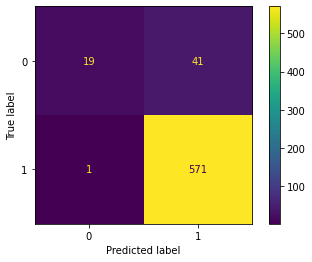

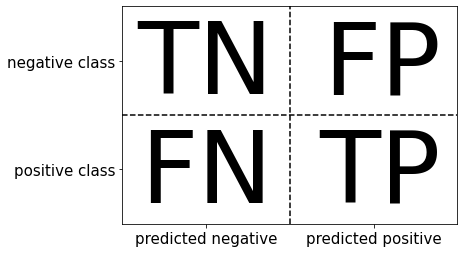

In [105]:
# Матрица ошибок
print(ConfusionMatrixDisplay.from_predictions(test['Оператор'], pred))
plt.show()
mglearn.plots.plot_binary_confusion_matrix()

In [106]:
# Выведем значимости признаков для принятия решения в пользу того или иного класса
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Почтовый индекс,6.760953
1,ФО,5.513194
2,Размер ДХ,5.378474
3,Тип нас.пункта,5.175573
4,Общее телесмотрение Пн-Пт,4.256330
5,Телесмотрение в рабочее время Пн-Пт,3.936753
6,Общее телесмотрение в выходные,3.641354
7,Телесмотрение утром в выходные,3.515646
8,Телесмотрение в рабочее время в выходные,3.439230
9,Просмотр жанра сад в праздники,3.271160


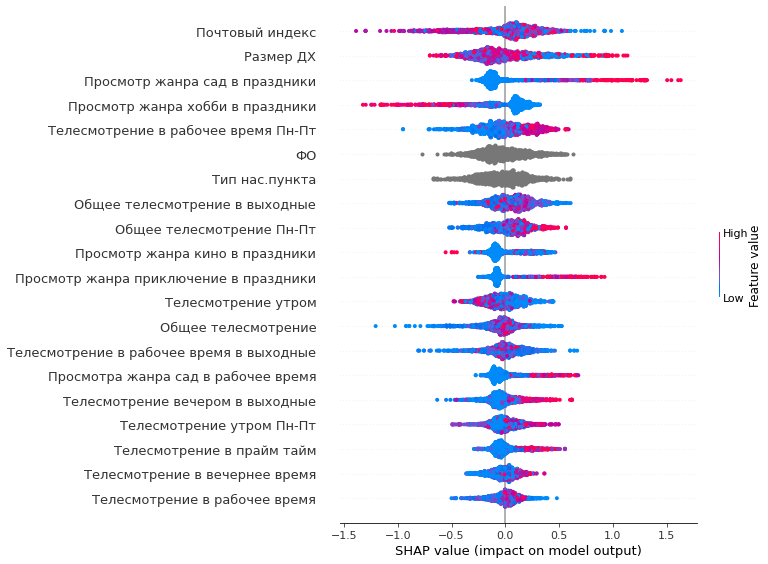

In [147]:
# Визуализируем значимость переменных
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train[X])
shap.summary_plot(shap_values, train[X])

# Обучение модели таргет - Оператор

In [75]:
# Обучение модели таргет - Оператор
cat_op.fit(X_train_op,y_train_op, eval_set=(X_valid_op,y_valid_op),
        verbose=200)

0:	learn: 0.8520718	test: 0.8321738	best: 0.8321738 (0)	total: 230ms	remaining: 3m 49s
200:	learn: 0.8797279	test: 0.8515232	best: 0.8515232 (153)	total: 15.1s	remaining: 59.9s
400:	learn: 0.9095768	test: 0.8692376	best: 0.8718285 (393)	total: 24.2s	remaining: 36.2s
600:	learn: 0.9489229	test: 0.8865165	best: 0.8877046 (503)	total: 35s	remaining: 23.3s
800:	learn: 0.9618004	test: 0.8931259	best: 0.8931259 (787)	total: 44.8s	remaining: 11.1s
999:	learn: 0.9786758	test: 0.8946713	best: 0.8946713 (955)	total: 54.8s	remaining: 0us

bestTest = 0.8946712571
bestIteration = 955

Shrink model to first 956 iterations.


In [95]:
cat_op.get_best_score()

{'learn': {'Logloss': 0.17097859783871772, 'F1': 0.9792484698876757},
 'validation': {'Logloss': 0.38876368332141675, 'F1': 0.8946712570747308}}

**После подбора гиперпараметров получили достаточно хорошее качество модели , модель обладает хорошей обобщающей способностью
Посмотрим на матрицу ошибок**

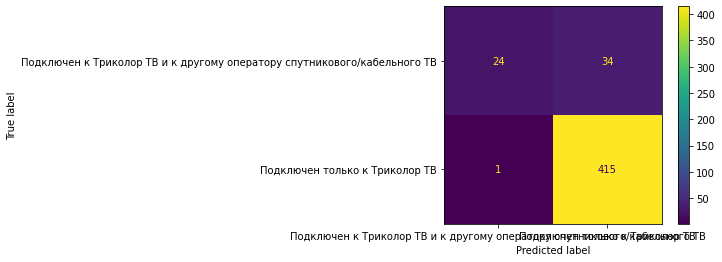

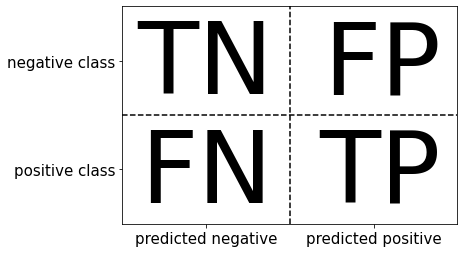

In [77]:
# Матрица ошибок
print(ConfusionMatrixDisplay.from_predictions(y_valid_op, pred))
plt.show()
mglearn.plots.plot_binary_confusion_matrix()

**Модель хорошо разделяет положительный и отрицательный класс , доля ошибок первого рода не большая,
в условиях дисбаланса классов это хорошие показатели**

In [78]:
# Выведем значимости признаков для принятия решения в пользу того или иного класса
cat_op.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Почтовый индекс,7.095807
1,ФО,6.079834
2,Телесмотрение в рабочее время в выходные,4.669104
3,Просмотр жанра сад в праздники,4.530914
4,Общее телесмотрение Пн-Пт,4.516645
5,Просмотр жанра хобби в праздники,4.317723
6,Телесмотрение в рабочее время Пн-Пт,3.479316
7,Просмотра жанра сад в рабочее время,3.468517
8,Телесмотрение в вечернее время Пн-Пт,3.444848
9,Тип нас.пункта,3.416476


Модель уверенно делает выбор опираясь на признаки:
* Почтовый индекс
* Телесмотрение в рабочее время в выходные
* Просмотр жанра хобби в праздники
* Состав ДХ

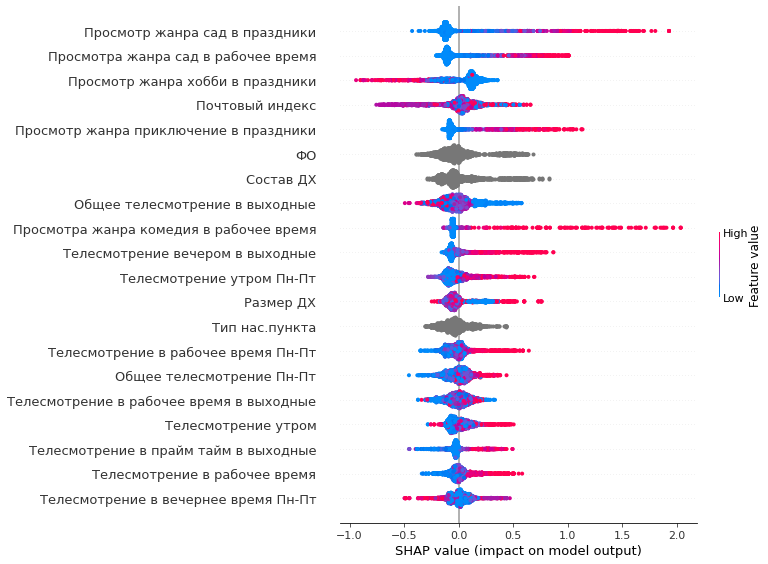

In [42]:
# Визуализируем значимость переменных
explainer = shap.TreeExplainer(cat_op)
shap_values = explainer.shap_values(X_train_op)
shap.summary_plot(shap_values, X_train_op)

# Обучение модели таргет - Есть ли Интернет

In [83]:
# Обучение модели таргет - Есть ли Интернет
cat_in.fit(X_train_in,y_train_in, eval_set=(X_valid_in,y_valid_in),
           verbose=200)

0:	learn: 0.3109771	test: 0.3344370	best: 0.3344370 (0)	total: 114ms	remaining: 1m 53s
200:	learn: 0.7281743	test: 0.6206276	best: 0.6242199 (170)	total: 14.8s	remaining: 58.8s
400:	learn: 0.8708570	test: 0.7123248	best: 0.7168947 (391)	total: 24.6s	remaining: 36.7s
600:	learn: 0.9248039	test: 0.7546843	best: 0.7566096 (585)	total: 34.2s	remaining: 22.7s
800:	learn: 0.9421495	test: 0.7875047	best: 0.7875047 (798)	total: 43.9s	remaining: 10.9s
999:	learn: 0.9576010	test: 0.8059057	best: 0.8059057 (994)	total: 53.7s	remaining: 0us

bestTest = 0.805905669
bestIteration = 994

Shrink model to first 995 iterations.


In [94]:
cat_in.get_best_score()

{'learn': {'Logloss': 0.20835496592271366, 'F1': 0.9576010421288284},
 'validation': {'Logloss': 0.384219831909616, 'F1': 0.8059056689956959}}

In [85]:
# Метрики качества модели по таргету - Есть ли Интернет
pred_in = cat_in.predict(X_valid_in)
metric_in = pd.DataFrame({'Есть ли Интернет':[accuracy_score(y_valid_in, pred_in),
                                      f1_score(y_valid_in, pred_in),
                                      roc_auc_score(y_valid_in, pred_in)]}, index=index)
metric_in

ValueError: pos_label=1 is not a valid label. It should be one of ['Есть', 'Нет']

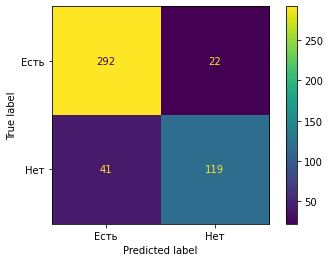

In [86]:
# Матрица ошибок
ConfusionMatrixDisplay.from_predictions(y_valid_in, pred_in)

In [89]:
# Выведем значимости признаков для принятия решения в пользу того или иного класса
cat_in.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Почтовый индекс,5.953706
1,Размер ДХ,5.869866
2,ФО,5.350696
3,Телесмотрение в рабочее время Пн-Пт,4.944818
4,Тип нас.пункта,4.663491
5,Телесмотрение в рабочее время,4.415201
6,Телесмотрение ночью в выходные,4.005529
7,Телесмотрение утром,3.680193
8,Общее телесмотрение в выходные,3.530729
9,Телесмотрение утром в выходные,3.366201


Модель уверенно делает выбор опираясь на признаки:
* Федеральный округ
* Почтовый индекс
* Тип нас.пункта
* Состав ДХ

# Обучение модели таргет - Состав ДХ

In [90]:
# Обучение модели таргет - Состав ДХ
cat_dx.fit(X_train_dx,y_train_dx, eval_set=(X_valid_dx,y_valid_dx),
           verbose=200,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3443298	test: 0.2971339	best: 0.2971339 (0)	total: 56.6ms	remaining: 56.5s
200:	learn: 0.9154694	test: 0.6985519	best: 0.7069439 (193)	total: 15.3s	remaining: 1m
400:	learn: 0.9818800	test: 0.7323203	best: 0.7422330 (387)	total: 29s	remaining: 43.3s
600:	learn: 0.9933988	test: 0.7666744	best: 0.7682983 (582)	total: 45.1s	remaining: 29.9s
800:	learn: 0.9995599	test: 0.7857805	best: 0.7959351 (731)	total: 57.2s	remaining: 14.2s
999:	learn: 1.0000000	test: 0.7934291	best: 0.8016910 (862)	total: 1m 9s	remaining: 0us

bestTest = 0.8016909584
bestIteration = 862

Shrink model to first 863 iterations.


In [92]:
# Метрика качества модели по таргету - Состав ДХ
metric_dx = pd.DataFrame({'Состав ДХ':[cat_dx.get_best_score()['validation']['Kappa']]}, index=['Cohen`s Kappa'])
metric_dx

,Состав ДХ
Cohen`s Kappa,0.801691


In [49]:
# Выведем значимости признаков для принятия решения в пользу того или иного класса
cat_dx.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Размер ДХ,24.562685
1,ФО,6.586475
2,Почтовый индекс,6.484432
3,Тип нас.пункта,5.408442
4,Телесмотрение в рабочее время в выходные,3.325610
5,Телесмотрение в рабочее время Пн-Пт,3.228373
6,Общее телесмотрение Пн-Пт,3.067115
7,Общее телесмотрение,3.064049
8,Общее телесмотрение в выходные,2.770922
9,Тип ресивера,2.711633


* Главный признак для выбора класса модели - Размер домохозяйсва , что вполне логично.
* Почтовый индекс, Федеральный округ и Тип нас. пункта, имеют большие веса для выбора класса

# Метрики

**Метрики качества моделей по итогу обучения и валидации**

In [50]:
final_binar_metric = metric_op.join(metric_in)
display(final_binar_metric)
metric_dx

,Оператор,Есть ли Интернет
Accuracy,0.930380,0.869198
F1_Score,0.961850,0.903427
AUC_ROC,0.715517,0.843033


,Состав ДХ
Cohen`s Kappa,0.787141


**Обучим модель на полных тренировочных данных**

In [64]:
# Обучение модели таргет - Оператор
cat_op.fit(X_operator,y_operator,
           verbose=200)

0:	learn: 0.8507696	total: 116ms	remaining: 1m 56s
200:	learn: 0.8723925	total: 15.6s	remaining: 1m 1s
400:	learn: 0.9087133	total: 29.4s	remaining: 43.9s
600:	learn: 0.9441070	total: 46.8s	remaining: 31.1s
800:	learn: 0.9580934	total: 1m 2s	remaining: 15.6s
999:	learn: 0.9762176	total: 1m 13s	remaining: 0us


In [65]:
# Обучение модели таргет - Есть ли Интернет
cat_in.fit(X_internet,y_internet,
           verbose=200)

0:	learn: 0.6957501	total: 68.8ms	remaining: 1m 8s
200:	learn: 0.8403140	total: 12.4s	remaining: 49.3s
400:	learn: 0.9034707	total: 29.9s	remaining: 44.7s
600:	learn: 0.9354352	total: 46.1s	remaining: 30.6s
800:	learn: 0.9538397	total: 59.6s	remaining: 14.8s
999:	learn: 0.9623413	total: 1m 20s	remaining: 0us


In [66]:
# Обучение модели таргет - Состав ДХ
cat_dx.fit(X_dx,y_dx, eval_set=(X_valid_dx,y_valid_dx),
           verbose=200,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3610931	test: 0.3424566	best: 0.3424566 (0)	total: 76.9ms	remaining: 1m 16s
200:	learn: 0.9070631	test: 0.8862651	best: 0.8862651 (196)	total: 27.3s	remaining: 1m 48s
400:	learn: 0.9778156	test: 0.9670329	best: 0.9670329 (400)	total: 37.5s	remaining: 56s
600:	learn: 0.9936456	test: 0.9810507	best: 0.9843636 (539)	total: 49.7s	remaining: 33s
800:	learn: 0.9996259	test: 0.9901344	best: 0.9901344 (769)	total: 1m 2s	remaining: 15.4s
999:	learn: 1.0000000	test: 0.9901344	best: 0.9901344 (769)	total: 1m 13s	remaining: 0us

bestTest = 0.9901344388
bestIteration = 769

Shrink model to first 770 iterations.


In [155]:
submit = pd.read_csv('test.csv')

In [156]:
submit['Оператор'] = cat_op.predict(test)
submit['Есть ли Интернет'] = cat_in.predict(test)
submit['Состав ДХ'] = cat_dx.predict(test)

In [157]:
final_submit  = submit[['id', 'Оператор', 'Есть ли Интернет', 'Состав ДХ']].copy()

In [158]:
final_submit['Оператор'] = final_submit['Оператор'].apply(lambda x:'Подключен только к Триколор ТВ' if x == 1 else 'Подключен к Триколор ТВ и к другому оператору спутникового/кабельного ТВ')
final_submit['Есть ли Интернет'] = final_submit['Есть ли Интернет'].apply(lambda x:'Есть' if x == 1 else 'Нет')
final_submit['Состав ДХ'] = final_submit['Состав ДХ'].apply(lambda x:'Есть члены семьи в возрасте 55+ лет и есть до 18 лет' if x==1 else('Нет членов семьи в возрасте 55+ лет и нет до 18 лет' if x==2 else('Нет членов семьи в возрасте 55+ лет и есть до 18 лет' if x==3 else 'Есть члены семьи в возрасте 55+ лет и нет до 18 лет')))

In [159]:
final_submit.to_csv('Ryazanov_submit',sep=',', index=False)

In [160]:
display(final_submit)
display(pd.read_csv('sampleSubmission.csv'))

,id,Оператор,Есть ли Интернет,Состав ДХ
0,3244,Подключен только к Триколор ТВ,Есть,Нет членов семьи в возрасте 55+ лет и нет до 1...
1,3245,Подключен только к Триколор ТВ,Есть,Есть члены семьи в возрасте 55+ лет и нет до 1...
2,3246,Подключен только к Триколор ТВ,Нет,Есть члены семьи в возрасте 55+ лет и нет до 1...
3,3247,Подключен только к Триколор ТВ,Есть,Нет членов семьи в возрасте 55+ лет и есть до ...
4,3248,Подключен только к Триколор ТВ,Нет,Есть члены семьи в возрасте 55+ лет и нет до 1...
...,...,...,...,...
806,4050,Подключен только к Триколор ТВ,Есть,Есть члены семьи в возрасте 55+ лет и нет до 1...
807,4051,Подключен только к Триколор ТВ,Нет,Есть члены семьи в возрасте 55+ лет и нет до 1...
808,4052,Подключен только к Триколор ТВ,Есть,Нет членов семьи в возрасте 55+ лет и есть до ...
809,4053,Подключен только к Триколор ТВ,Нет,Есть члены семьи в возрасте 55+ лет и нет до 1...


,id,Оператор,Есть ли Интернет,Состав ДХ
0,1,Подключен только к Триколор ТВ,Нет,Нет членов семьи в возрасте 55+ лет и есть до ...
1,2,Подключен к Триколор ТВ и к другому оператору ...,Есть,Есть члены семьи в возрасте 55+ лет и нет до 1...
2,3,Подключен только к Триколор ТВ,Есть,Нет членов семьи в возрасте 55+ лет и нет до 1...
3,4,Подключен к Триколор ТВ и к другому оператору ...,Нет,Есть члены семьи в возрасте 55+ лет и есть до ...


In [161]:
final_submit.columns == pd.read_csv('sampleSubmission.csv').columns

array([ True,  True,  True,  True])